In [1]:
# Einfach Neuronales Netz, welches auf den FashionMNIST Daten trainiert wird
# Vorhersage, ob das Bild ein Tshirt/Top ist, oder nicht
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0 #Setze alle labels auf True, falls Tshirt, sonst false

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_test = y_test == 0

In [2]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\Nick\.conda\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nick\.conda\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nick\.conda\envs\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nick\.conda\envs\python36\lib\site-packag

In [3]:
model = Sequential()

#Ein Hidden Layer mit 100 Neuronen, danach sofort ein Neuron als Ausgang.
#Input von 28*28 = 784 (da ein Bild 28*28 Pixel)
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
#model fitten mittels 10 Durchläufen (Epochs)
#Gewichte anpassen nach 1000 Datensätzen (batch)
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=15,
    batch_size=5000)

Epoch 1/15
60000/60000 [==============================] - 0s 5us/step - loss: 0.0830 - accuracy: 0.9665
Epoch 2/15
60000/60000 [==============================] - 0s 5us/step - loss: 0.0826 - accuracy: 0.9660
Epoch 3/15
60000/60000 [==============================] - 0s 6us/step - loss: 0.0824 - accuracy: 0.9660
Epoch 4/15
60000/60000 [==============================] - 0s 6us/step - loss: 0.0823 - accuracy: 0.9663
Epoch 5/15
60000/60000 [==============================] - 0s 5us/step - loss: 0.0822 - accuracy: 0.9663
Epoch 6/15
60000/60000 [==============================] - 0s 6us/step - loss: 0.0821 - accuracy: 0.9664
Epoch 7/15
60000/60000 [==============================] - 0s 6us/step - loss: 0.0821 - accuracy: 0.9662
Epoch 8/15
60000/60000 [==============================] - 0s 6us/step - loss: 0.0820 - accuracy: 0.9666
Epoch 9/15
60000/60000 [==============================] - 0s 6us/step - loss: 0.0818 - accuracy: 0.9666
Epoch 10/15
60000/60000 [==============================] - 0s 6u

In [14]:
#Evaluiere Genauigkeit des Models
#Ausgabe: ['loss', 'acc'] => Genauigkeit in Prozent im 2. Eintrag 
model.evaluate(X_test.reshape(-1, 784), y_test)

10000/10000 [==============================] - 0s 18us/step


[0.09625337751507759, 0.9616000056266785]

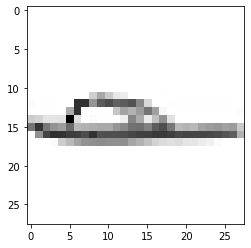

In [19]:
#Grafische Ausgabe und manuelles Testen
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[30], cmap="gray_r")
plt.show()

In [20]:
#Wahrscheinlichkeit, dass es sich um ein Thirt handelt
model.predict(X_train[30].reshape(1, 784)) 

array([[0.00396225]], dtype=float32)